In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
VOO = yf.download(tickers=['VOO'], interval='1mo', auto_adjust=True)
VOO.dropna(inplace=True)
VOO.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,VOO,VOO,VOO,VOO,VOO
Date,,,,,
2025-03-01,510.558105,545.707352,499.361653,544.624495,179918100
2025-04-01,508.171082,519.884917,441.437111,510.783013,250654400
2025-05-01,540.092529,545.765019,509.526894,513.544489,127049900
2025-06-01,566.281738,567.398286,536.144739,538.587211,151109600
2025-07-01,574.799988,575.200012,565.799988,566.559998,16058158


In [361]:
# VOO information at a specific date
VOO.loc['2025-06-01'].to_dict()

{('Close', 'VOO'): 565.476318359375,
 ('High', 'VOO'): 565.513916015625,
 ('Low', 'VOO'): 537.7999877929688,
 ('Open', 'VOO'): 540.25,
 ('Volume', 'VOO'): 139768624.0}

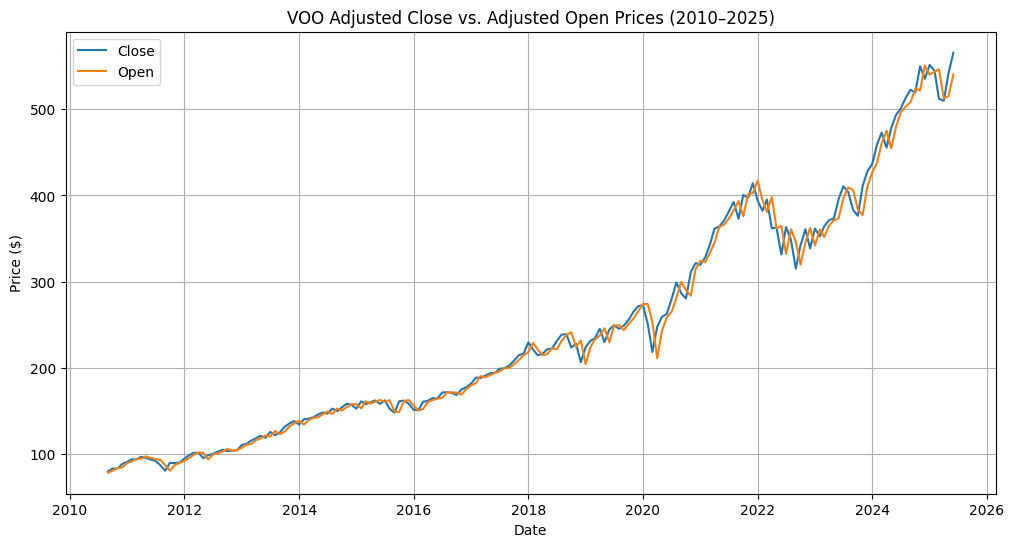

In [362]:
plt.figure(figsize = (12,6))
plt.plot(VOO.index, VOO['Close'], label='Close')
plt.plot(VOO.index, VOO['Open'], label='Open')
plt.title("VOO Adjusted Close vs. Adjusted Open Prices (2010–2025)")
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()

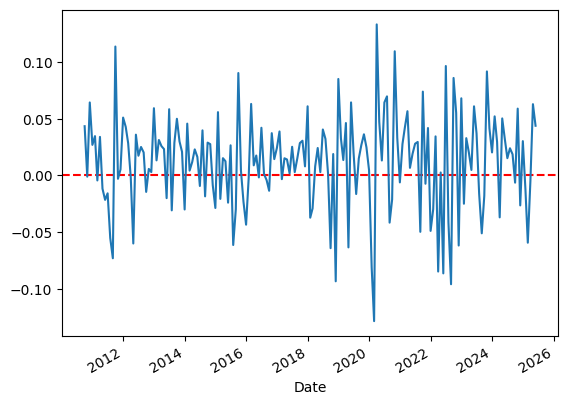

In [363]:
VOO['Return'] = VOO['Close'].pct_change()
plt.axhline(color='r', linestyle='--')
VOO['Return'].plot()
plt.show()
pass

In [364]:
VOO['LogReturn'] = np.log(VOO['Close']['VOO'] / VOO['Close']['VOO'].shift(1))
VOO[['LogReturn']].tail()

Price,LogReturn
Ticker,
Date,
2025-02-01,-0.012731
2025-03-01,-0.061175
2025-04-01,-0.004686
2025-05-01,0.060922
2025-06-01,0.042845


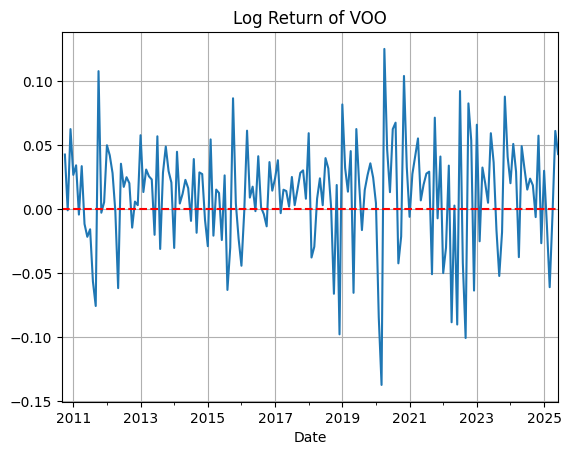

In [365]:
VOO['LogReturn'].plot()
plt.title("Log Return of VOO")
plt.axhline(color='r', linestyle='--')
plt.grid(True)
plt.show()

In [366]:
VOO['SMA_20'] = VOO['Close'].rolling(window=20).mean()
VOO['SMA_50'] = VOO['Close'].rolling(window=50).mean()

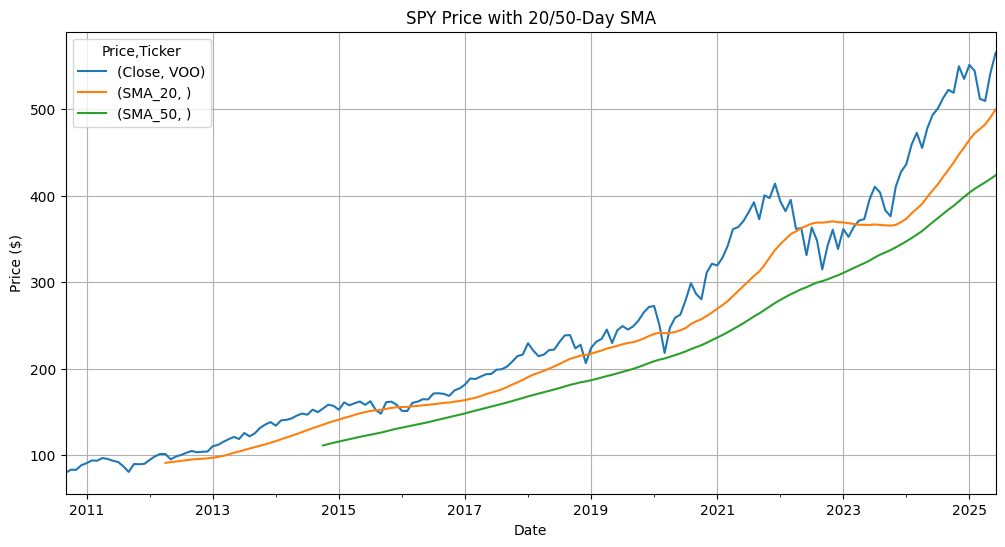

In [367]:
VOO[['Close', 'SMA_20', 'SMA_50']].plot(
    figsize=(12, 6),
    title="SPY Price with 20/50-Day SMA"
)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

In [368]:
VOO['Signal'] = 0
VOO.loc[VOO['SMA_20'] > VOO['SMA_50'], 'Signal'] = 1
VOO.loc[VOO['SMA_20'] < VOO['SMA_50'], 'Signal'] = -1

In [369]:
VOO[['Close', 'SMA_20', 'SMA_50', 'Signal']].tail(10)


Price,Close,SMA_20,SMA_50,Signal
Ticker,VOO,,,
Date,,,,
2024-09-01,522.541077,430.088547,384.020851,1
2024-10-01,519.202332,438.425035,388.426190,1
2024-11-01,549.778137,447.711423,393.692046,1
2024-12-01,535.235229,455.905087,398.789066,1
2025-01-01,551.418274,464.818472,403.595898,1
2025-02-01,544.442444,472.246286,408.056541,1
2025-03-01,512.134399,477.327081,411.910654,1
2025-04-01,509.739990,482.622383,415.540159,1


In [370]:
VOO['Cumulative Return'] = (1 + VOO['Close'].pct_change()).cumprod()

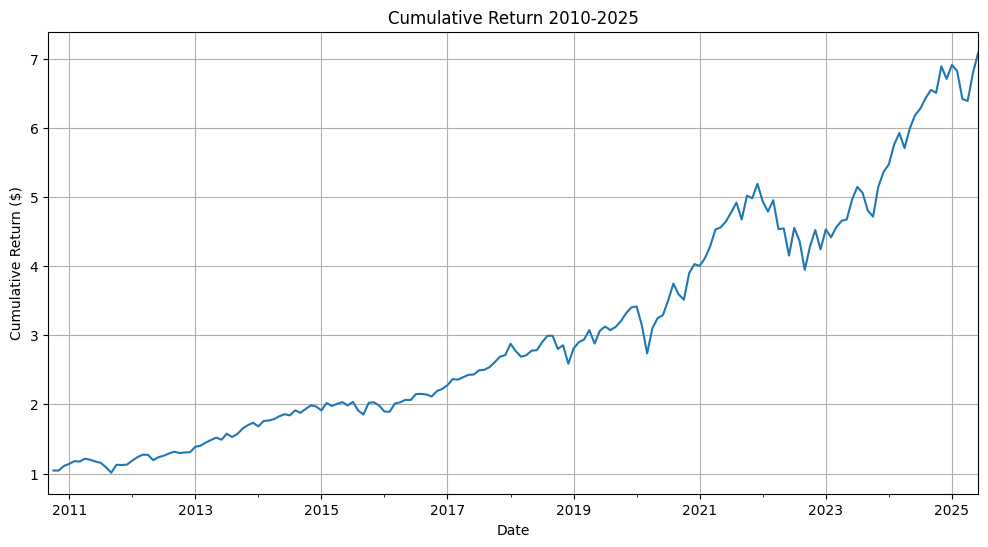

In [371]:
VOO['Cumulative Return'].plot(figsize=(12, 6), title='Cumulative Return 2010-2025', xlabel='Date', ylabel='Cumulative Return ($)')
plt.grid(True)
plt.show()

In [372]:
print(f"Cumulative Return since Inception is: ${VOO['Cumulative Return'].max()
.round(2)}")

Cumulative Return since Inception is: $7.09


In [373]:
VOO['Volatility'] = VOO['Return'].std()
annual_volatility = VOO['Volatility'] * (252 ** 0.5)

In [374]:
# Sharpe Ratio: assess the risk-adjusted return of an investment or portfolio. It essentially measures how much excess return an investment provides for each unit of risk taken. A higher Sharpe ratio indicates a better risk-adjusted return, meaning the investment has generated more profit for the amount of risk involved

In [406]:
sharpe_ratio = (VOO['Return'].mean() / (VOO['Return'].std()) * np.sqrt(252))
sharpe_ratio

np.float64(4.550891212581219)